#### General REQs

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd

In [2]:
# !pwd
path='/Users/hrm/Documents/Dropbox/DSrelated/DG_datachallenge/'
# path = '/home/ubuntu/pynb/DG_datachallenge'

### Reload Model  
--- best to load model def + load weights  
(oddly the model.save-ed version didn't have the trained weights...)    
https://keras.io/models/about-keras-models/

In [3]:
from keras.models import Model, Sequential
from keras.models import load_model

Using TensorFlow backend.


In [4]:
cnn_model0 = load_model('./model/CNNmodelNOweights_3diffconvkerns.h5')

/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/keras/models.py:240: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [5]:
cnn_model0.load_weights('./model/model_v3.1a.h5')

In [6]:
cnn_model0.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 254, 254, 64)      36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 127, 127, 64)      0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 127, 127, 64)      0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 127, 127, 128)     204928    
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 123, 123, 128)     409728    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 61, 61, 128)       0         
__________

### Image Files/paths

In [7]:
import glob
import os, sys
import shutil

path = "/Users/hrm/Documents/Dropbox/DSrelated/DG_datachallenge/"

Build_dir = glob.glob(os.path.join(path+'building_set/buildings/','*.tif')) #os.listdir( path+'/buildings/' )
# buildingFileNames
NoBuild_dir = glob.glob(os.path.join(path+'building_set/no_buildings/','*.tif')) #os.listdir( path+'/no_buildings' )
# nobuildingFileNames


In [8]:
def getFileNum(filename):
    return filename.split('/')[-1][:-4]

In [ ]:
# filename = Build_dir[1] #path+'tmp_imgs/2902.tif'
# fN = getFileNum(filename)
# print(fN)

### Def function to run same preprocessing images as those fed into cnn models

In [9]:
import numpy as np
from skimage import color, exposure, transform

# NUM_CLASSES = 2
IMG_SIZE = 256

def preprocess_img(img):
    img=np.array(img)
    # Histogram normalization in v channel
    hsv = color.rgb2hsv(img)
    hsv[:,:,2] = exposure.equalize_hist(hsv[:,:,2])
    img = color.hsv2rgb(hsv)

    # central square crop
    min_side = min(img.shape[:-1])
    centre = img.shape[0]//2, img.shape[1]//2
    img = img[centre[0]-min_side//2:centre[0]+min_side//2,
              centre[1]-min_side//2:centre[1]+min_side//2,
              :]

    # rescale to standard size
    img = transform.resize(img, (IMG_SIZE, IMG_SIZE), mode='constant')

    # roll color axis to axis 0
    #img = np.rollaxis(img,-1)

    return img

In [10]:
from skimage import io

def RUNpreprocessImg(filename, returnImgArray=None, FilePrefix=None):
    # img = preprocess_img(io.imread(img_path))
    img = preprocess_img(io.imread(filename))

    fN = getFileNum(filename)
    io.imsave(path+'tmp_imgs/' + str(FilePrefix) + '_' +str(fN) + '_p.jpg', img)
    
    print('made a preprocesed JPEG copy of ' + format(fN) + '.tif --> saved : ./' +'tmp_imgs/'+str(FilePrefix) + '_' +str(fN) + '_p.jpg' )

    X = np.array(img, dtype='float32')    
    if returnImgArray==1:
        return X

In [11]:
# Test
img0 = RUNpreprocessImg(Build_dir[2],1)

made a preprocesed JPEG copy of 100663.tif --> saved : ./tmp_imgs/None_100663_p.jpg


/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


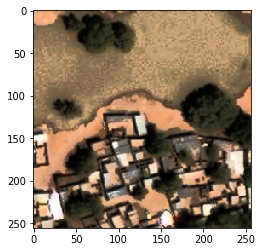

In [12]:
plt.imshow(img0)

### convert tif --> jpeg so quiver sees it 
| prob could use skimage.io as well...

In [13]:
import gdal

def MakeJPEGcopyfromTIF(filename, FilePrefix):
    # Assume this retrieves the dataset from a GeoTIFF file.
    # dataset = getDataSet(tiffFileLocation)      
    gtif = gdal.Open(filename) #gdal.Open(path+'tmp_imgs/1113.tif')

    fN = getFileNum(filename)

    saveOptions = []
    saveOptions.append("QUALITY=75")

    # Obtains a JPEG GDAL driver
    jpegDriver = gdal.GetDriverByName("JPEG")   

    # Create the .JPG file
    # jpegDriver.CreateCopy("imageFile.jpg", dataset, 0, saveOptions)  
    jpegDriver.CreateCopy(path+'tmp_imgs/' + str(FilePrefix) + '_' +str(fN) + '_o.jpg', gtif, 0, saveOptions)  
    
    print('made a JPEG copy of ' + format(fN) + '.tif --> saved : ./' +'tmp_imgs/'+str(FilePrefix) + '_' +str(fN) + '_o.jpg' )


In [14]:
# Test
MakeJPEGcopyfromTIF(Build_dir[2], 'B')

made a JPEG copy of 100663.tif --> saved : ./tmp_imgs/B_100663_o.jpg


### Create some tmp jpeg images to try on Quiver server

In [15]:
for filename in np.random.choice(Build_dir,10):
    MakeJPEGcopyfromTIF(filename, 'B')
    RUNpreprocessImg(filename, returnImgArray=None, FilePrefix= 'B')

made a JPEG copy of 778224.tif --> saved : ./tmp_imgs/B_778224_o.jpg
made a preprocesed JPEG copy of 778224.tif --> saved : ./tmp_imgs/B_778224_p.jpg
made a JPEG copy of 115276.tif --> saved : ./tmp_imgs/B_115276_o.jpg
made a preprocesed JPEG copy of 115276.tif --> saved : ./tmp_imgs/B_115276_p.jpg
made a JPEG copy of 821145.tif --> saved : ./tmp_imgs/B_821145_o.jpg


/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint

made a preprocesed JPEG copy of 821145.tif --> saved : ./tmp_imgs/B_821145_p.jpg
made a JPEG copy of 522104.tif --> saved : ./tmp_imgs/B_522104_o.jpg
made a preprocesed JPEG copy of 522104.tif --> saved : ./tmp_imgs/B_522104_p.jpg
made a JPEG copy of 458506.tif --> saved : ./tmp_imgs/B_458506_o.jpg
made a preprocesed JPEG copy of 458506.tif --> saved : ./tmp_imgs/B_458506_p.jpg
made a JPEG copy of 389640.tif --> saved : ./tmp_imgs/B_389640_o.jpg
made a preprocesed JPEG copy of 389640.tif --> saved : ./tmp_imgs/B_389640_p.jpg
made a JPEG copy of 448485.tif --> saved : ./tmp_imgs/B_448485_o.jpg


/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


made a preprocesed JPEG copy of 448485.tif --> saved : ./tmp_imgs/B_448485_p.jpg
made a JPEG copy of 499610.tif --> saved : ./tmp_imgs/B_499610_o.jpg
made a preprocesed JPEG copy of 499610.tif --> saved : ./tmp_imgs/B_499610_p.jpg
made a JPEG copy of 822552.tif --> saved : ./tmp_imgs/B_822552_o.jpg
made a preprocesed JPEG copy of 822552.tif --> saved : ./tmp_imgs/B_822552_p.jpg
made a JPEG copy of 650517.tif --> saved : ./tmp_imgs/B_650517_o.jpg
made a preprocesed JPEG copy of 650517.tif --> saved : ./tmp_imgs/B_650517_p.jpg


/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [16]:
for filename in np.random.choice(NoBuild_dir,10):
    MakeJPEGcopyfromTIF(filename, 'NB')
    RUNpreprocessImg(filename, returnImgArray=None, FilePrefix='NB')

made a JPEG copy of 137609.tif --> saved : ./tmp_imgs/NB_137609_o.jpg
made a preprocesed JPEG copy of 137609.tif --> saved : ./tmp_imgs/NB_137609_p.jpg
made a JPEG copy of 498326.tif --> saved : ./tmp_imgs/NB_498326_o.jpg
made a preprocesed JPEG copy of 498326.tif --> saved : ./tmp_imgs/NB_498326_p.jpg
made a JPEG copy of 760125.tif --> saved : ./tmp_imgs/NB_760125_o.jpg


/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


made a preprocesed JPEG copy of 760125.tif --> saved : ./tmp_imgs/NB_760125_p.jpg
made a JPEG copy of 260154.tif --> saved : ./tmp_imgs/NB_260154_o.jpg
made a preprocesed JPEG copy of 260154.tif --> saved : ./tmp_imgs/NB_260154_p.jpg
made a JPEG copy of 632637.tif --> saved : ./tmp_imgs/NB_632637_o.jpg
made a preprocesed JPEG copy of 632637.tif --> saved : ./tmp_imgs/NB_632637_p.jpg
made a JPEG copy of 124139.tif --> saved : ./tmp_imgs/NB_124139_o.jpg
made a preprocesed JPEG copy of 124139.tif --> saved : ./tmp_imgs/NB_124139_p.jpg
made a JPEG copy of 268331.tif --> saved : ./tmp_imgs/NB_268331_o.jpg
made a preprocesed JPEG copy of 268331.tif --> saved : ./tmp_imgs/NB_268331_p.jpg
made a JPEG copy of 450201.tif --> saved : ./tmp_imgs/NB_450201_o.jpg


/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint

made a preprocesed JPEG copy of 450201.tif --> saved : ./tmp_imgs/NB_450201_p.jpg
made a JPEG copy of 340697.tif --> saved : ./tmp_imgs/NB_340697_o.jpg
made a preprocesed JPEG copy of 340697.tif --> saved : ./tmp_imgs/NB_340697_p.jpg
made a JPEG copy of 22766.tif --> saved : ./tmp_imgs/NB_22766_o.jpg
made a preprocesed JPEG copy of 22766.tif --> saved : ./tmp_imgs/NB_22766_p.jpg


/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


## Try viewing Model and see what it learnt with quiver
https://github.com/jakebian/quiver

In [17]:
from quiver_engine import server

In [18]:
# server.launch(model)
# server.launch(cnn_model)

server.launch(cnn_model0, input_folder='./tmp_imgs')  ## outputs a bunch of tmp images in ./tmp/ folder... gets huge

## INTERRUPT KERNEL TO STOP SERVER...

Starting webserver from: /Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/quiver_engine


::1 - - [2017-04-18 01:29:01] "GET /model HTTP/1.1" 200 9517 0.004842
::1 - - [2017-04-18 01:29:01] "GET /inputs HTTP/1.1" 200 1001 0.002630
::1 - - [2017-04-18 01:29:02] "GET /input-file/B_115276_o.jpg HTTP/1.1" 200 7592 0.009377
::1 - - [2017-04-18 01:29:02] "GET /input-file/B_115276_p.jpg HTTP/1.1" 200 13329 0.001268
::1 - - [2017-04-18 01:29:02] "GET /input-file/B_389640_o.jpg HTTP/1.1" 200 13615 0.002037
::1 - - [2017-04-18 01:29:02] "GET /input-file/B_389640_p.jpg HTTP/1.1" 200 18636 0.001577
::1 - - [2017-04-18 01:29:02] "GET /input-file/B_448485_o.jpg HTTP/1.1" 200 14197 0.001315
::1 - - [2017-04-18 01:29:02] "GET /input-file/B_448485_p.jpg HTTP/1.1" 200 16596 0.001264
::1 - - [2017-04-18 01:29:02] "GET /input-file/B_458506_o.jpg HTTP/1.1" 200 14060 0.001295
::1 - - [2017-04-18 01:29:02] "GET /input-file/NB_268331_p.jpg HTTP/1.1" 200 18571 0.001346
::1 - - [2017-04-18 01:29:02] "GET /input-file/B_821145_o.jpg HTTP/1.1" 200 11227 0.001399
::1 - - [2017-04-18 01:29:02] "GET /inpu

::1 - - [2017-04-18 01:29:09] "GET /temp-file/conv2d_32_30_B_115276_p.jpg.png HTTP/1.1" 200 22031 0.001788
::1 - - [2017-04-18 01:29:09] "GET /temp-file/conv2d_32_31_B_115276_p.jpg.png HTTP/1.1" 200 40618 0.002073
::1 - - [2017-04-18 01:29:09] "GET /temp-file/conv2d_32_32_B_115276_p.jpg.png HTTP/1.1" 200 28777 0.002947
::1 - - [2017-04-18 01:29:09] "GET /temp-file/conv2d_32_33_B_115276_p.jpg.png HTTP/1.1" 200 47453 0.004226
::1 - - [2017-04-18 01:29:09] "GET /temp-file/conv2d_32_35_B_115276_p.jpg.png HTTP/1.1" 200 25076 0.002431
::1 - - [2017-04-18 01:29:09] "GET /temp-file/conv2d_32_36_B_115276_p.jpg.png HTTP/1.1" 200 35164 0.001546
::1 - - [2017-04-18 01:29:09] "GET /temp-file/conv2d_32_34_B_115276_p.jpg.png HTTP/1.1" 200 497 0.001839
::1 - - [2017-04-18 01:29:09] "GET /temp-file/conv2d_32_39_B_115276_p.jpg.png HTTP/1.1" 200 23859 0.001666
::1 - - [2017-04-18 01:29:09] "GET /temp-file/conv2d_32_38_B_115276_p.jpg.png HTTP/1.1" 200 41065 0.001757
::1 - - [2017-04-18 01:29:09] "GET /tem

::1 - - [2017-04-18 01:29:19] "GET /temp-file/conv2d_32_49_B_389640_p.jpg.png HTTP/1.1" 200 48770 0.004220
::1 - - [2017-04-18 01:29:19] "GET /temp-file/conv2d_32_48_B_389640_p.jpg.png HTTP/1.1" 200 47426 0.002332
::1 - - [2017-04-18 01:29:19] "GET /temp-file/conv2d_32_50_B_389640_p.jpg.png HTTP/1.1" 200 12060 0.001375
::1 - - [2017-04-18 01:29:19] "GET /temp-file/conv2d_32_51_B_389640_p.jpg.png HTTP/1.1" 200 49512 0.004697
::1 - - [2017-04-18 01:29:19] "GET /temp-file/conv2d_32_52_B_389640_p.jpg.png HTTP/1.1" 200 42649 0.001339
::1 - - [2017-04-18 01:29:19] "GET /temp-file/conv2d_32_53_B_389640_p.jpg.png HTTP/1.1" 200 48021 0.002033
::1 - - [2017-04-18 01:29:19] "GET /temp-file/conv2d_32_54_B_389640_p.jpg.png HTTP/1.1" 200 19105 0.001542
::1 - - [2017-04-18 01:29:19] "GET /temp-file/conv2d_32_57_B_389640_p.jpg.png HTTP/1.1" 200 39669 0.002275
::1 - - [2017-04-18 01:29:19] "GET /temp-file/conv2d_32_56_B_389640_p.jpg.png HTTP/1.1" 200 45450 0.001822
::1 - - [2017-04-18 01:29:19] "GET /t

::1 - - [2017-04-18 01:29:28] "GET /layer/conv2d_33/B_389640_p.jpg HTTP/1.1" 200 5026 0.600594
::1 - - [2017-04-18 01:29:29] "GET /temp-file/conv2d_33_0_B_389640_p.jpg.png HTTP/1.1" 200 12623 0.001630
::1 - - [2017-04-18 01:29:29] "GET /temp-file/conv2d_33_4_B_389640_p.jpg.png HTTP/1.1" 200 13030 0.001357
::1 - - [2017-04-18 01:29:29] "GET /temp-file/conv2d_33_5_B_389640_p.jpg.png HTTP/1.1" 200 12567 0.001456
::1 - - [2017-04-18 01:29:29] "GET /temp-file/conv2d_33_2_B_389640_p.jpg.png HTTP/1.1" 200 12103 0.001414
::1 - - [2017-04-18 01:29:29] "GET /temp-file/conv2d_33_1_B_389640_p.jpg.png HTTP/1.1" 200 476 0.001721
::1 - - [2017-04-18 01:29:29] "GET /temp-file/conv2d_33_3_B_389640_p.jpg.png HTTP/1.1" 200 12013 0.001262
::1 - - [2017-04-18 01:29:29] "GET /temp-file/conv2d_33_6_B_389640_p.jpg.png HTTP/1.1" 200 5043 0.001144
::1 - - [2017-04-18 01:29:29] "GET /temp-file/conv2d_33_7_B_389640_p.jpg.png HTTP/1.1" 200 7471 0.001330
::1 - - [2017-04-18 01:29:29] "GET /temp-file/conv2d_33_8_B_3

::1 - - [2017-04-18 01:29:29] "GET /temp-file/conv2d_33_92_B_389640_p.jpg.png HTTP/1.1" 200 12194 0.006292
::1 - - [2017-04-18 01:29:29] "GET /temp-file/conv2d_33_96_B_389640_p.jpg.png HTTP/1.1" 200 4130 0.001582
::1 - - [2017-04-18 01:29:29] "GET /temp-file/conv2d_33_97_B_389640_p.jpg.png HTTP/1.1" 200 6925 0.002720
::1 - - [2017-04-18 01:29:29] "GET /temp-file/conv2d_33_98_B_389640_p.jpg.png HTTP/1.1" 200 3791 0.002871
::1 - - [2017-04-18 01:29:29] "GET /temp-file/conv2d_33_95_B_389640_p.jpg.png HTTP/1.1" 200 13477 0.002190
::1 - - [2017-04-18 01:29:29] "GET /temp-file/conv2d_33_101_B_389640_p.jpg.png HTTP/1.1" 200 12808 0.002370
::1 - - [2017-04-18 01:29:29] "GET /temp-file/conv2d_33_100_B_389640_p.jpg.png HTTP/1.1" 200 13358 0.002803
::1 - - [2017-04-18 01:29:29] "GET /temp-file/conv2d_33_102_B_389640_p.jpg.png HTTP/1.1" 200 13301 0.001539
::1 - - [2017-04-18 01:29:29] "GET /temp-file/conv2d_33_99_B_389640_p.jpg.png HTTP/1.1" 200 14275 0.001274
::1 - - [2017-04-18 01:29:29] "GET /t

::1 - - [2017-04-18 01:29:35] "GET /temp-file/conv2d_34_45_B_389640_p.jpg.png HTTP/1.1" 200 3299 0.003581
::1 - - [2017-04-18 01:29:35] "GET /temp-file/conv2d_34_46_B_389640_p.jpg.png HTTP/1.1" 200 11905 0.002377
::1 - - [2017-04-18 01:29:35] "GET /temp-file/conv2d_34_47_B_389640_p.jpg.png HTTP/1.1" 200 11517 0.003203
::1 - - [2017-04-18 01:29:35] "GET /temp-file/conv2d_34_48_B_389640_p.jpg.png HTTP/1.1" 200 9798 0.003407
::1 - - [2017-04-18 01:29:35] "GET /temp-file/conv2d_34_49_B_389640_p.jpg.png HTTP/1.1" 200 12171 0.001869
::1 - - [2017-04-18 01:29:35] "GET /temp-file/conv2d_34_51_B_389640_p.jpg.png HTTP/1.1" 200 11735 0.001499
::1 - - [2017-04-18 01:29:35] "GET /temp-file/conv2d_34_50_B_389640_p.jpg.png HTTP/1.1" 200 10267 0.001583
::1 - - [2017-04-18 01:29:35] "GET /temp-file/conv2d_34_52_B_389640_p.jpg.png HTTP/1.1" 200 410 0.001121
::1 - - [2017-04-18 01:29:35] "GET /temp-file/conv2d_34_53_B_389640_p.jpg.png HTTP/1.1" 200 10115 0.001650
::1 - - [2017-04-18 01:29:35] "GET /temp-

/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/quiver_engine/layer_result_generators.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("dr..., inputs=Tensor("co...)`
  output=model.get_layer(layer_name).output
::1 - - [2017-04-18 01:29:50] "GET /layer/dropout_22/B_389640_p.jpg HTTP/1.1" 200 5154 0.607769
::1 - - [2017-04-18 01:29:51] "GET /temp-file/dropout_22_0_B_389640_p.jpg.png HTTP/1.1" 200 445 0.001608
::1 - - [2017-04-18 01:29:51] "GET /temp-file/dropout_22_1_B_389640_p.jpg.png HTTP/1.1" 200 2348 0.001372
::1 - - [2017-04-18 01:29:51] "GET /temp-file/dropout_22_4_B_389640_p.jpg.png HTTP/1.1" 200 2482 0.001202
::1 - - [2017-04-18 01:29:51] "GET /temp-file/dropout_22_3_B_389640_p.jpg.png HTTP/1.1" 200 3202 0.001188
::1 - - [2017-04-18 01:29:51] "GET /temp-file/dropout_22_2_B_389640_p.jpg.png HTTP/1.1" 200 2747 0.001250
::1 - - [2017-04-18 01:29:51] "GET /temp-file/dropout_22_5_B_389640_p.jpg.png HTTP/1.1" 200 3449 0.001290
::

::1 - - [2017-04-18 01:29:51] "GET /temp-file/dropout_22_120_B_389640_p.jpg.png HTTP/1.1" 200 3478 0.003080
::1 - - [2017-04-18 01:29:51] "GET /temp-file/dropout_22_121_B_389640_p.jpg.png HTTP/1.1" 200 633 0.003800
::1 - - [2017-04-18 01:29:51] "GET /temp-file/dropout_22_124_B_389640_p.jpg.png HTTP/1.1" 200 901 0.001928
::1 - - [2017-04-18 01:29:51] "GET /temp-file/dropout_22_123_B_389640_p.jpg.png HTTP/1.1" 200 409 0.002154
::1 - - [2017-04-18 01:29:51] "GET /temp-file/dropout_22_122_B_389640_p.jpg.png HTTP/1.1" 200 3433 0.001473
::1 - - [2017-04-18 01:29:51] "GET /temp-file/dropout_22_127_B_389640_p.jpg.png HTTP/1.1" 200 3091 0.001493
::1 - - [2017-04-18 01:29:51] "GET /temp-file/dropout_22_125_B_389640_p.jpg.png HTTP/1.1" 200 820 0.001547
::1 - - [2017-04-18 01:29:51] "GET /temp-file/dropout_22_126_B_389640_p.jpg.png HTTP/1.1" 200 3837 0.001889
::1 - - [2017-04-18 01:30:20] "GET /layer/conv2d_35/B_389640_p.jpg HTTP/1.1" 200 10018 1.037463
::1 - - [2017-04-18 01:30:20] "GET /temp-fil

::1 - - [2017-04-18 01:30:21] "GET /temp-file/conv2d_35_107_B_389640_p.jpg.png HTTP/1.1" 200 712 0.002669
::1 - - [2017-04-18 01:30:21] "GET /temp-file/conv2d_35_108_B_389640_p.jpg.png HTTP/1.1" 200 2960 0.001522
::1 - - [2017-04-18 01:30:21] "GET /temp-file/conv2d_35_109_B_389640_p.jpg.png HTTP/1.1" 200 2410 0.002003
::1 - - [2017-04-18 01:30:21] "GET /temp-file/conv2d_35_110_B_389640_p.jpg.png HTTP/1.1" 200 3098 0.001253
::1 - - [2017-04-18 01:30:21] "GET /temp-file/conv2d_35_111_B_389640_p.jpg.png HTTP/1.1" 200 1378 0.001577
::1 - - [2017-04-18 01:30:21] "GET /temp-file/conv2d_35_112_B_389640_p.jpg.png HTTP/1.1" 200 3168 0.001288
::1 - - [2017-04-18 01:30:21] "GET /temp-file/conv2d_35_113_B_389640_p.jpg.png HTTP/1.1" 200 2480 0.001193
::1 - - [2017-04-18 01:30:21] "GET /temp-file/conv2d_35_114_B_389640_p.jpg.png HTTP/1.1" 200 3324 0.001160
::1 - - [2017-04-18 01:30:21] "GET /temp-file/conv2d_35_115_B_389640_p.jpg.png HTTP/1.1" 200 1058 0.001496
::1 - - [2017-04-18 01:30:21] "GET /te

::1 - - [2017-04-18 01:30:21] "GET /temp-file/conv2d_35_235_B_389640_p.jpg.png HTTP/1.1" 200 3314 0.002691
::1 - - [2017-04-18 01:30:21] "GET /temp-file/conv2d_35_236_B_389640_p.jpg.png HTTP/1.1" 200 2927 0.001101
::1 - - [2017-04-18 01:30:21] "GET /temp-file/conv2d_35_237_B_389640_p.jpg.png HTTP/1.1" 200 2457 0.001546
::1 - - [2017-04-18 01:30:21] "GET /temp-file/conv2d_35_238_B_389640_p.jpg.png HTTP/1.1" 200 2837 0.001560
::1 - - [2017-04-18 01:30:21] "GET /temp-file/conv2d_35_239_B_389640_p.jpg.png HTTP/1.1" 200 3275 0.001177
::1 - - [2017-04-18 01:30:21] "GET /temp-file/conv2d_35_240_B_389640_p.jpg.png HTTP/1.1" 200 3012 0.001326
::1 - - [2017-04-18 01:30:21] "GET /temp-file/conv2d_35_241_B_389640_p.jpg.png HTTP/1.1" 200 3165 0.001293
::1 - - [2017-04-18 01:30:21] "GET /temp-file/conv2d_35_242_B_389640_p.jpg.png HTTP/1.1" 200 904 0.001336
::1 - - [2017-04-18 01:30:21] "GET /temp-file/conv2d_35_243_B_389640_p.jpg.png HTTP/1.1" 200 715 0.001234
::1 - - [2017-04-18 01:30:21] "GET /tem

::1 - - [2017-04-18 01:30:43] "GET /temp-file/conv2d_36_118_B_389640_p.jpg.png HTTP/1.1" 200 431 0.002556
::1 - - [2017-04-18 01:30:43] "GET /temp-file/conv2d_36_119_B_389640_p.jpg.png HTTP/1.1" 200 410 0.002311
::1 - - [2017-04-18 01:30:43] "GET /temp-file/conv2d_36_120_B_389640_p.jpg.png HTTP/1.1" 200 396 0.001881
::1 - - [2017-04-18 01:30:43] "GET /temp-file/conv2d_36_121_B_389640_p.jpg.png HTTP/1.1" 200 396 0.001544
::1 - - [2017-04-18 01:30:43] "GET /temp-file/conv2d_36_122_B_389640_p.jpg.png HTTP/1.1" 200 481 0.001226
::1 - - [2017-04-18 01:30:43] "GET /temp-file/conv2d_36_123_B_389640_p.jpg.png HTTP/1.1" 200 2121 0.001453
::1 - - [2017-04-18 01:30:43] "GET /temp-file/conv2d_36_124_B_389640_p.jpg.png HTTP/1.1" 200 401 0.001583
::1 - - [2017-04-18 01:30:43] "GET /temp-file/conv2d_36_125_B_389640_p.jpg.png HTTP/1.1" 200 396 0.004400
::1 - - [2017-04-18 01:30:43] "GET /temp-file/conv2d_36_126_B_389640_p.jpg.png HTTP/1.1" 200 2637 0.002311
::1 - - [2017-04-18 01:30:43] "GET /temp-fil

::1 - - [2017-04-18 01:30:44] "GET /temp-file/conv2d_36_217_B_389640_p.jpg.png HTTP/1.1" 200 417 0.002159
::1 - - [2017-04-18 01:30:44] "GET /temp-file/conv2d_36_218_B_389640_p.jpg.png HTTP/1.1" 200 511 0.002076
::1 - - [2017-04-18 01:30:44] "GET /temp-file/conv2d_36_219_B_389640_p.jpg.png HTTP/1.1" 200 547 0.001814
::1 - - [2017-04-18 01:30:44] "GET /temp-file/conv2d_36_220_B_389640_p.jpg.png HTTP/1.1" 200 1344 0.001368
::1 - - [2017-04-18 01:30:44] "GET /temp-file/conv2d_36_222_B_389640_p.jpg.png HTTP/1.1" 200 396 0.001191
::1 - - [2017-04-18 01:30:44] "GET /temp-file/conv2d_36_221_B_389640_p.jpg.png HTTP/1.1" 200 396 0.001389
::1 - - [2017-04-18 01:30:44] "GET /temp-file/conv2d_36_223_B_389640_p.jpg.png HTTP/1.1" 200 2603 0.001365
::1 - - [2017-04-18 01:30:44] "GET /temp-file/conv2d_36_225_B_389640_p.jpg.png HTTP/1.1" 200 448 0.001189
::1 - - [2017-04-18 01:30:44] "GET /temp-file/conv2d_36_224_B_389640_p.jpg.png HTTP/1.1" 200 1325 0.001752
::1 - - [2017-04-18 01:30:44] "GET /temp-fi

::1 - - [2017-04-18 01:30:57] "GET /temp-file/max_pooling2d_18_46_B_389640_p.jpg.png HTTP/1.1" 200 387 0.002213
::1 - - [2017-04-18 01:30:57] "GET /temp-file/max_pooling2d_18_47_B_389640_p.jpg.png HTTP/1.1" 200 387 0.002428
::1 - - [2017-04-18 01:30:57] "GET /temp-file/max_pooling2d_18_49_B_389640_p.jpg.png HTTP/1.1" 200 420 0.001103
::1 - - [2017-04-18 01:30:57] "GET /temp-file/max_pooling2d_18_48_B_389640_p.jpg.png HTTP/1.1" 200 391 0.001382
::1 - - [2017-04-18 01:30:57] "GET /temp-file/max_pooling2d_18_50_B_389640_p.jpg.png HTTP/1.1" 200 459 0.001739
::1 - - [2017-04-18 01:30:57] "GET /temp-file/max_pooling2d_18_52_B_389640_p.jpg.png HTTP/1.1" 200 991 0.001403
::1 - - [2017-04-18 01:30:57] "GET /temp-file/max_pooling2d_18_51_B_389640_p.jpg.png HTTP/1.1" 200 387 0.001873
::1 - - [2017-04-18 01:30:57] "GET /temp-file/max_pooling2d_18_53_B_389640_p.jpg.png HTTP/1.1" 200 387 0.004742
::1 - - [2017-04-18 01:30:57] "GET /temp-file/max_pooling2d_18_54_B_389640_p.jpg.png HTTP/1.1" 200 800 0

::1 - - [2017-04-18 01:30:57] "GET /temp-file/max_pooling2d_18_166_B_389640_p.jpg.png HTTP/1.1" 200 475 0.003283
::1 - - [2017-04-18 01:30:57] "GET /temp-file/max_pooling2d_18_169_B_389640_p.jpg.png HTTP/1.1" 200 386 0.001862
::1 - - [2017-04-18 01:30:57] "GET /temp-file/max_pooling2d_18_168_B_389640_p.jpg.png HTTP/1.1" 200 386 0.002175
::1 - - [2017-04-18 01:30:57] "GET /temp-file/max_pooling2d_18_170_B_389640_p.jpg.png HTTP/1.1" 200 386 0.001911
::1 - - [2017-04-18 01:30:57] "GET /temp-file/max_pooling2d_18_172_B_389640_p.jpg.png HTTP/1.1" 200 472 0.001785
::1 - - [2017-04-18 01:30:57] "GET /temp-file/max_pooling2d_18_171_B_389640_p.jpg.png HTTP/1.1" 200 386 0.001662
::1 - - [2017-04-18 01:30:57] "GET /temp-file/max_pooling2d_18_173_B_389640_p.jpg.png HTTP/1.1" 200 824 0.001564
::1 - - [2017-04-18 01:30:57] "GET /temp-file/max_pooling2d_18_174_B_389640_p.jpg.png HTTP/1.1" 200 547 0.001911
::1 - - [2017-04-18 01:30:57] "GET /temp-file/max_pooling2d_18_175_B_389640_p.jpg.png HTTP/1.1" 

::1 - - [2017-04-18 01:31:20] "GET /layer/dropout_23/B_389640_p.jpg HTTP/1.1" 200 10275 1.343191
::1 - - [2017-04-18 01:31:20] "GET /temp-file/dropout_23_0_B_389640_p.jpg.png HTTP/1.1" 200 477 0.001790
::1 - - [2017-04-18 01:31:20] "GET /temp-file/dropout_23_1_B_389640_p.jpg.png HTTP/1.1" 200 401 0.001338
::1 - - [2017-04-18 01:31:20] "GET /temp-file/dropout_23_5_B_389640_p.jpg.png HTTP/1.1" 200 1028 0.001272
::1 - - [2017-04-18 01:31:20] "GET /temp-file/dropout_23_2_B_389640_p.jpg.png HTTP/1.1" 200 592 0.001341
::1 - - [2017-04-18 01:31:20] "GET /temp-file/dropout_23_3_B_389640_p.jpg.png HTTP/1.1" 200 387 0.001118
::1 - - [2017-04-18 01:31:20] "GET /temp-file/dropout_23_4_B_389640_p.jpg.png HTTP/1.1" 200 419 0.001082
::1 - - [2017-04-18 01:31:20] "GET /temp-file/dropout_23_13_B_389640_p.jpg.png HTTP/1.1" 200 386 0.001407
::1 - - [2017-04-18 01:31:20] "GET /temp-file/dropout_23_9_B_389640_p.jpg.png HTTP/1.1" 200 450 0.001325
::1 - - [2017-04-18 01:31:20] "GET /temp-file/dropout_23_17_B

::1 - - [2017-04-18 01:31:21] "GET /temp-file/dropout_23_86_B_389640_p.jpg.png HTTP/1.1" 200 666 0.001461
::1 - - [2017-04-18 01:31:21] "GET /temp-file/dropout_23_87_B_389640_p.jpg.png HTTP/1.1" 200 1022 0.001510
::1 - - [2017-04-18 01:31:21] "GET /temp-file/dropout_23_88_B_389640_p.jpg.png HTTP/1.1" 200 399 0.001349
::1 - - [2017-04-18 01:31:21] "GET /temp-file/dropout_23_89_B_389640_p.jpg.png HTTP/1.1" 200 627 0.000869
::1 - - [2017-04-18 01:31:21] "GET /temp-file/dropout_23_90_B_389640_p.jpg.png HTTP/1.1" 200 1016 0.001585
::1 - - [2017-04-18 01:31:21] "GET /temp-file/dropout_23_91_B_389640_p.jpg.png HTTP/1.1" 200 404 0.001401
::1 - - [2017-04-18 01:31:21] "GET /temp-file/dropout_23_92_B_389640_p.jpg.png HTTP/1.1" 200 386 0.001461
::1 - - [2017-04-18 01:31:21] "GET /temp-file/dropout_23_93_B_389640_p.jpg.png HTTP/1.1" 200 1009 0.001359
::1 - - [2017-04-18 01:31:21] "GET /temp-file/dropout_23_94_B_389640_p.jpg.png HTTP/1.1" 200 487 0.002613
::1 - - [2017-04-18 01:31:21] "GET /temp-fi

::1 - - [2017-04-18 01:31:21] "GET /temp-file/dropout_23_189_B_389640_p.jpg.png HTTP/1.1" 200 1012 0.002513
::1 - - [2017-04-18 01:31:21] "GET /temp-file/dropout_23_190_B_389640_p.jpg.png HTTP/1.1" 200 639 0.001259
::1 - - [2017-04-18 01:31:21] "GET /temp-file/dropout_23_191_B_389640_p.jpg.png HTTP/1.1" 200 1003 0.001790
::1 - - [2017-04-18 01:31:21] "GET /temp-file/dropout_23_192_B_389640_p.jpg.png HTTP/1.1" 200 387 0.001724
::1 - - [2017-04-18 01:31:21] "GET /temp-file/dropout_23_193_B_389640_p.jpg.png HTTP/1.1" 200 388 0.001278
::1 - - [2017-04-18 01:31:21] "GET /temp-file/dropout_23_194_B_389640_p.jpg.png HTTP/1.1" 200 387 0.001413
::1 - - [2017-04-18 01:31:21] "GET /temp-file/dropout_23_195_B_389640_p.jpg.png HTTP/1.1" 200 954 0.001249
::1 - - [2017-04-18 01:31:21] "GET /temp-file/dropout_23_196_B_389640_p.jpg.png HTTP/1.1" 200 442 0.001822
::1 - - [2017-04-18 01:31:21] "GET /temp-file/dropout_23_197_B_389640_p.jpg.png HTTP/1.1" 200 387 0.001382
::1 - - [2017-04-18 01:31:21] "GET 

::1 - - [2017-04-18 01:31:57] "GET /layer/flatten_6/B_389640_p.jpg HTTP/1.1" 500 444 0.933887
::1 - - [2017-04-18 01:32:10] "GET /layer/conv2d_35/B_389640_p.jpg HTTP/1.1" 200 10018 1.206737
[2017-04-18 01:32:28,094] ERROR in app: Exception on /predict/NB_124139_p.jpg [GET]
Traceback (most recent call last):
  File "/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/flask/app.py", line 1982, in wsgi_app
    response = self.full_dispatch_request()
  File "/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/flask/app.py", line 1614, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/flask_cors/extension.py", line 161, in wrapped_function
    return cors_after_request(app.make_response(f(*args, **kwargs)))
  File "/Users/hrm/anaconda3/envs/geopandas_env/lib/python3.5/site-packages/flask/app.py", line 1517, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  

::1 - - [2017-04-18 01:32:29] "GET /temp-file/conv2d_35_103_NB_124139_p.jpg.png HTTP/1.1" 200 3188 0.001199
::1 - - [2017-04-18 01:32:29] "GET /temp-file/conv2d_35_104_NB_124139_p.jpg.png HTTP/1.1" 200 674 0.001325
::1 - - [2017-04-18 01:32:29] "GET /temp-file/conv2d_35_105_NB_124139_p.jpg.png HTTP/1.1" 200 3334 0.001494
::1 - - [2017-04-18 01:32:29] "GET /temp-file/conv2d_35_106_NB_124139_p.jpg.png HTTP/1.1" 200 398 0.001293
::1 - - [2017-04-18 01:32:29] "GET /temp-file/conv2d_35_107_NB_124139_p.jpg.png HTTP/1.1" 200 622 0.001206
::1 - - [2017-04-18 01:32:29] "GET /temp-file/conv2d_35_108_NB_124139_p.jpg.png HTTP/1.1" 200 3051 0.001258
::1 - - [2017-04-18 01:32:29] "GET /temp-file/conv2d_35_109_NB_124139_p.jpg.png HTTP/1.1" 200 1872 0.001182
::1 - - [2017-04-18 01:32:29] "GET /temp-file/conv2d_35_110_NB_124139_p.jpg.png HTTP/1.1" 200 3029 0.001122
::1 - - [2017-04-18 01:32:29] "GET /temp-file/conv2d_35_111_NB_124139_p.jpg.png HTTP/1.1" 200 796 0.001178
::1 - - [2017-04-18 01:32:29] "G

::1 - - [2017-04-18 01:32:29] "GET /temp-file/conv2d_35_188_NB_124139_p.jpg.png HTTP/1.1" 200 398 0.001184
::1 - - [2017-04-18 01:32:29] "GET /temp-file/conv2d_35_189_NB_124139_p.jpg.png HTTP/1.1" 200 3121 0.001317
::1 - - [2017-04-18 01:32:29] "GET /temp-file/conv2d_35_191_NB_124139_p.jpg.png HTTP/1.1" 200 3394 0.001261
::1 - - [2017-04-18 01:32:29] "GET /temp-file/conv2d_35_190_NB_124139_p.jpg.png HTTP/1.1" 200 2931 0.001191
::1 - - [2017-04-18 01:32:29] "GET /temp-file/conv2d_35_193_NB_124139_p.jpg.png HTTP/1.1" 200 3346 0.001058
::1 - - [2017-04-18 01:32:29] "GET /temp-file/conv2d_35_192_NB_124139_p.jpg.png HTTP/1.1" 200 2424 0.001097
::1 - - [2017-04-18 01:32:29] "GET /temp-file/conv2d_35_194_NB_124139_p.jpg.png HTTP/1.1" 200 2746 0.001275
::1 - - [2017-04-18 01:32:29] "GET /temp-file/conv2d_35_195_NB_124139_p.jpg.png HTTP/1.1" 200 3124 0.001342
::1 - - [2017-04-18 01:32:29] "GET /temp-file/conv2d_35_196_NB_124139_p.jpg.png HTTP/1.1" 200 3098 0.001400
::1 - - [2017-04-18 01:32:29]

::1 - - [2017-04-18 01:32:34] "GET /temp-file/max_pooling2d_17_42_NB_124139_p.jpg.png HTTP/1.1" 200 2475 0.003368
::1 - - [2017-04-18 01:32:34] "GET /temp-file/max_pooling2d_17_44_NB_124139_p.jpg.png HTTP/1.1" 200 3471 0.004604
::1 - - [2017-04-18 01:32:34] "GET /temp-file/max_pooling2d_17_45_NB_124139_p.jpg.png HTTP/1.1" 200 488 0.003108
::1 - - [2017-04-18 01:32:34] "GET /temp-file/max_pooling2d_17_43_NB_124139_p.jpg.png HTTP/1.1" 200 398 0.001432
::1 - - [2017-04-18 01:32:34] "GET /temp-file/max_pooling2d_17_48_NB_124139_p.jpg.png HTTP/1.1" 200 3333 0.001073
::1 - - [2017-04-18 01:32:34] "GET /temp-file/max_pooling2d_17_49_NB_124139_p.jpg.png HTTP/1.1" 200 3803 0.001618
::1 - - [2017-04-18 01:32:34] "GET /temp-file/max_pooling2d_17_46_NB_124139_p.jpg.png HTTP/1.1" 200 3737 0.006411
::1 - - [2017-04-18 01:32:34] "GET /temp-file/max_pooling2d_17_47_NB_124139_p.jpg.png HTTP/1.1" 200 3768 0.002399
::1 - - [2017-04-18 01:32:34] "GET /temp-file/max_pooling2d_17_51_NB_124139_p.jpg.png HTTP

::1 - - [2017-04-18 01:32:34] "GET /temp-file/max_pooling2d_17_121_NB_124139_p.jpg.png HTTP/1.1" 200 441 0.002698
::1 - - [2017-04-18 01:32:34] "GET /temp-file/max_pooling2d_17_122_NB_124139_p.jpg.png HTTP/1.1" 200 3465 0.001628
::1 - - [2017-04-18 01:32:34] "GET /temp-file/max_pooling2d_17_123_NB_124139_p.jpg.png HTTP/1.1" 200 399 0.001241
::1 - - [2017-04-18 01:32:34] "GET /temp-file/max_pooling2d_17_124_NB_124139_p.jpg.png HTTP/1.1" 200 464 0.001262
::1 - - [2017-04-18 01:32:34] "GET /temp-file/max_pooling2d_17_125_NB_124139_p.jpg.png HTTP/1.1" 200 399 0.001536
::1 - - [2017-04-18 01:32:34] "GET /temp-file/max_pooling2d_17_126_NB_124139_p.jpg.png HTTP/1.1" 200 4000 0.001311
::1 - - [2017-04-18 01:32:34] "GET /temp-file/max_pooling2d_17_127_NB_124139_p.jpg.png HTTP/1.1" 200 3268 0.001189
::1 - - [2017-04-18 01:32:38] "GET /layer/dropout_22/NB_124139_p.jpg HTTP/1.1" 200 5282 0.798886
::1 - - [2017-04-18 01:32:39] "GET /temp-file/dropout_22_0_NB_124139_p.jpg.png HTTP/1.1" 200 398 0.001

::1 - - [2017-04-18 01:32:39] "GET /temp-file/dropout_22_64_NB_124139_p.jpg.png HTTP/1.1" 200 3692 0.001182
::1 - - [2017-04-18 01:32:39] "GET /temp-file/dropout_22_94_NB_124139_p.jpg.png HTTP/1.1" 200 3337 0.002340
::1 - - [2017-04-18 01:32:39] "GET /temp-file/dropout_22_81_NB_124139_p.jpg.png HTTP/1.1" 200 3655 0.001299
::1 - - [2017-04-18 01:32:39] "GET /temp-file/dropout_22_59_NB_124139_p.jpg.png HTTP/1.1" 200 3318 0.001037
::1 - - [2017-04-18 01:32:39] "GET /temp-file/dropout_22_84_NB_124139_p.jpg.png HTTP/1.1" 200 3518 0.001271
::1 - - [2017-04-18 01:32:39] "GET /temp-file/dropout_22_111_NB_124139_p.jpg.png HTTP/1.1" 200 3970 0.001245
::1 - - [2017-04-18 01:32:39] "GET /temp-file/dropout_22_61_NB_124139_p.jpg.png HTTP/1.1" 200 496 0.001205
::1 - - [2017-04-18 01:32:39] "GET /temp-file/dropout_22_108_NB_124139_p.jpg.png HTTP/1.1" 200 3784 0.001233
::1 - - [2017-04-18 01:32:39] "GET /temp-file/dropout_22_71_NB_124139_p.jpg.png HTTP/1.1" 200 924 0.001245
::1 - - [2017-04-18 01:32:39

::1 - - [2017-04-18 01:32:45] "GET /temp-file/dropout_22_67_NB_450201_o.jpg.png HTTP/1.1" 200 2943 0.002269
::1 - - [2017-04-18 01:32:45] "GET /temp-file/dropout_22_68_NB_450201_o.jpg.png HTTP/1.1" 200 3199 0.003527
::1 - - [2017-04-18 01:32:45] "GET /temp-file/dropout_22_69_NB_450201_o.jpg.png HTTP/1.1" 200 2823 0.001204
::1 - - [2017-04-18 01:32:45] "GET /temp-file/dropout_22_72_NB_450201_o.jpg.png HTTP/1.1" 200 3007 0.001323
::1 - - [2017-04-18 01:32:45] "GET /temp-file/dropout_22_70_NB_450201_o.jpg.png HTTP/1.1" 200 3318 0.000873
::1 - - [2017-04-18 01:32:45] "GET /temp-file/dropout_22_71_NB_450201_o.jpg.png HTTP/1.1" 200 506 0.001145
::1 - - [2017-04-18 01:32:45] "GET /temp-file/dropout_22_74_NB_450201_o.jpg.png HTTP/1.1" 200 2129 0.001196
::1 - - [2017-04-18 01:32:45] "GET /temp-file/dropout_22_73_NB_450201_o.jpg.png HTTP/1.1" 200 2733 0.001058
::1 - - [2017-04-18 01:32:45] "GET /temp-file/dropout_22_75_NB_450201_o.jpg.png HTTP/1.1" 200 3082 0.000999
::1 - - [2017-04-18 01:32:45]

::1 - - [2017-04-18 01:32:59] "GET /temp-file/dropout_23_119_NB_450201_o.jpg.png HTTP/1.1" 200 387 0.004366
::1 - - [2017-04-18 01:32:59] "GET /temp-file/dropout_23_75_NB_450201_o.jpg.png HTTP/1.1" 200 387 0.002883
::1 - - [2017-04-18 01:32:59] "GET /temp-file/dropout_23_54_NB_450201_o.jpg.png HTTP/1.1" 200 521 0.003736
::1 - - [2017-04-18 01:32:59] "GET /temp-file/dropout_23_102_NB_450201_o.jpg.png HTTP/1.1" 200 403 0.003014
::1 - - [2017-04-18 01:32:59] "GET /temp-file/dropout_23_85_NB_450201_o.jpg.png HTTP/1.1" 200 387 0.002743
::1 - - [2017-04-18 01:32:59] "GET /temp-file/dropout_23_126_NB_450201_o.jpg.png HTTP/1.1" 200 936 0.002415
::1 - - [2017-04-18 01:32:59] "GET /temp-file/dropout_23_130_NB_450201_o.jpg.png HTTP/1.1" 200 387 0.001522
::1 - - [2017-04-18 01:32:59] "GET /temp-file/dropout_23_48_NB_450201_o.jpg.png HTTP/1.1" 200 387 0.001942
::1 - - [2017-04-18 01:32:59] "GET /temp-file/dropout_23_74_NB_450201_o.jpg.png HTTP/1.1" 200 988 0.001105
::1 - - [2017-04-18 01:32:59] "GE

::1 - - [2017-04-18 01:33:00] "GET /temp-file/dropout_23_182_NB_450201_o.jpg.png HTTP/1.1" 200 387 0.003487
::1 - - [2017-04-18 01:33:00] "GET /temp-file/dropout_23_183_NB_450201_o.jpg.png HTTP/1.1" 200 387 0.001829
::1 - - [2017-04-18 01:33:00] "GET /temp-file/dropout_23_185_NB_450201_o.jpg.png HTTP/1.1" 200 387 0.001283
::1 - - [2017-04-18 01:33:00] "GET /temp-file/dropout_23_184_NB_450201_o.jpg.png HTTP/1.1" 200 387 0.001127
::1 - - [2017-04-18 01:33:00] "GET /temp-file/dropout_23_186_NB_450201_o.jpg.png HTTP/1.1" 200 387 0.000953
::1 - - [2017-04-18 01:33:00] "GET /temp-file/dropout_23_187_NB_450201_o.jpg.png HTTP/1.1" 200 980 0.001181
::1 - - [2017-04-18 01:33:00] "GET /temp-file/dropout_23_188_NB_450201_o.jpg.png HTTP/1.1" 200 955 0.001180
::1 - - [2017-04-18 01:33:00] "GET /temp-file/dropout_23_189_NB_450201_o.jpg.png HTTP/1.1" 200 917 0.001969
::1 - - [2017-04-18 01:33:00] "GET /temp-file/dropout_23_191_NB_450201_o.jpg.png HTTP/1.1" 200 879 0.001042
::1 - - [2017-04-18 01:33:00

::1 - - [2017-04-18 01:33:06] "GET /predict/B_822552_p.jpg HTTP/1.1" 500 444 0.002591
::1 - - [2017-04-18 01:33:07] "GET /layer/dropout_23/B_822552_p.jpg HTTP/1.1" 200 10275 1.048816
::1 - - [2017-04-18 01:33:07] "GET /temp-file/dropout_23_0_B_822552_p.jpg.png HTTP/1.1" 200 481 0.001751
::1 - - [2017-04-18 01:33:07] "GET /temp-file/dropout_23_4_B_822552_p.jpg.png HTTP/1.1" 200 385 0.001763
::1 - - [2017-04-18 01:33:07] "GET /temp-file/dropout_23_2_B_822552_p.jpg.png HTTP/1.1" 200 545 0.002822
::1 - - [2017-04-18 01:33:07] "GET /temp-file/dropout_23_5_B_822552_p.jpg.png HTTP/1.1" 200 996 0.002086
::1 - - [2017-04-18 01:33:07] "GET /temp-file/dropout_23_3_B_822552_p.jpg.png HTTP/1.1" 200 385 0.002211
::1 - - [2017-04-18 01:33:07] "GET /temp-file/dropout_23_1_B_822552_p.jpg.png HTTP/1.1" 200 385 0.002123
::1 - - [2017-04-18 01:33:07] "GET /temp-file/dropout_23_6_B_822552_p.jpg.png HTTP/1.1" 200 861 0.001671
::1 - - [2017-04-18 01:33:07] "GET /temp-file/dropout_23_7_B_822552_p.jpg.png HTTP

::1 - - [2017-04-18 01:33:07] "GET /temp-file/dropout_23_99_B_822552_p.jpg.png HTTP/1.1" 200 386 0.000755
::1 - - [2017-04-18 01:33:07] "GET /temp-file/dropout_23_100_B_822552_p.jpg.png HTTP/1.1" 200 387 0.000944
::1 - - [2017-04-18 01:33:07] "GET /temp-file/dropout_23_101_B_822552_p.jpg.png HTTP/1.1" 200 387 0.001092
::1 - - [2017-04-18 01:33:07] "GET /temp-file/dropout_23_102_B_822552_p.jpg.png HTTP/1.1" 200 455 0.001055
::1 - - [2017-04-18 01:33:07] "GET /temp-file/dropout_23_103_B_822552_p.jpg.png HTTP/1.1" 200 387 0.000783
::1 - - [2017-04-18 01:33:07] "GET /temp-file/dropout_23_104_B_822552_p.jpg.png HTTP/1.1" 200 439 0.001157
::1 - - [2017-04-18 01:33:07] "GET /temp-file/dropout_23_105_B_822552_p.jpg.png HTTP/1.1" 200 387 0.001256
::1 - - [2017-04-18 01:33:07] "GET /temp-file/dropout_23_106_B_822552_p.jpg.png HTTP/1.1" 200 387 0.001018
::1 - - [2017-04-18 01:33:07] "GET /temp-file/dropout_23_107_B_822552_p.jpg.png HTTP/1.1" 200 1021 0.001653
::1 - - [2017-04-18 01:33:07] "GET /t

::1 - - [2017-04-18 01:33:08] "GET /temp-file/dropout_23_221_B_822552_p.jpg.png HTTP/1.1" 200 387 0.006582
::1 - - [2017-04-18 01:33:08] "GET /temp-file/dropout_23_222_B_822552_p.jpg.png HTTP/1.1" 200 387 0.006922
::1 - - [2017-04-18 01:33:08] "GET /temp-file/dropout_23_223_B_822552_p.jpg.png HTTP/1.1" 200 1048 0.004643
::1 - - [2017-04-18 01:33:08] "GET /temp-file/dropout_23_224_B_822552_p.jpg.png HTTP/1.1" 200 713 0.003399
::1 - - [2017-04-18 01:33:08] "GET /temp-file/dropout_23_225_B_822552_p.jpg.png HTTP/1.1" 200 387 0.002709
::1 - - [2017-04-18 01:33:08] "GET /temp-file/dropout_23_226_B_822552_p.jpg.png HTTP/1.1" 200 990 0.001832
::1 - - [2017-04-18 01:33:08] "GET /temp-file/dropout_23_227_B_822552_p.jpg.png HTTP/1.1" 200 387 0.002113
::1 - - [2017-04-18 01:33:08] "GET /temp-file/dropout_23_228_B_822552_p.jpg.png HTTP/1.1" 200 405 0.001896
::1 - - [2017-04-18 01:33:08] "GET /temp-file/dropout_23_229_B_822552_p.jpg.png HTTP/1.1" 200 387 0.002163
::1 - - [2017-04-18 01:33:08] "GET /

::1 - - [2017-04-18 01:33:16] "GET /temp-file/conv2d_35_92_B_822552_p.jpg.png HTTP/1.1" 200 430 0.000699
::1 - - [2017-04-18 01:33:16] "GET /temp-file/conv2d_35_93_B_822552_p.jpg.png HTTP/1.1" 200 404 0.001293
::1 - - [2017-04-18 01:33:16] "GET /temp-file/conv2d_35_94_B_822552_p.jpg.png HTTP/1.1" 200 459 0.001196
::1 - - [2017-04-18 01:33:16] "GET /temp-file/conv2d_35_95_B_822552_p.jpg.png HTTP/1.1" 200 3315 0.001093
::1 - - [2017-04-18 01:33:16] "GET /temp-file/conv2d_35_96_B_822552_p.jpg.png HTTP/1.1" 200 3092 0.000763
::1 - - [2017-04-18 01:33:16] "GET /temp-file/conv2d_35_97_B_822552_p.jpg.png HTTP/1.1" 200 3034 0.000739
::1 - - [2017-04-18 01:33:16] "GET /temp-file/conv2d_35_98_B_822552_p.jpg.png HTTP/1.1" 200 2789 0.001040
::1 - - [2017-04-18 01:33:16] "GET /temp-file/conv2d_35_99_B_822552_p.jpg.png HTTP/1.1" 200 2857 0.001280
::1 - - [2017-04-18 01:33:16] "GET /temp-file/conv2d_35_100_B_822552_p.jpg.png HTTP/1.1" 200 2704 0.001342
::1 - - [2017-04-18 01:33:16] "GET /temp-file/co

::1 - - [2017-04-18 01:33:16] "GET /temp-file/conv2d_35_221_B_822552_p.jpg.png HTTP/1.1" 200 2993 0.004298
::1 - - [2017-04-18 01:33:16] "GET /temp-file/conv2d_35_220_B_822552_p.jpg.png HTTP/1.1" 200 3062 0.002205
::1 - - [2017-04-18 01:33:16] "GET /temp-file/conv2d_35_222_B_822552_p.jpg.png HTTP/1.1" 200 3224 0.002889
::1 - - [2017-04-18 01:33:16] "GET /temp-file/conv2d_35_223_B_822552_p.jpg.png HTTP/1.1" 200 969 0.001483
::1 - - [2017-04-18 01:33:16] "GET /temp-file/conv2d_35_225_B_822552_p.jpg.png HTTP/1.1" 200 544 0.001641
::1 - - [2017-04-18 01:33:16] "GET /temp-file/conv2d_35_224_B_822552_p.jpg.png HTTP/1.1" 200 3253 0.002153
::1 - - [2017-04-18 01:33:16] "GET /temp-file/conv2d_35_227_B_822552_p.jpg.png HTTP/1.1" 200 508 0.001301
::1 - - [2017-04-18 01:33:16] "GET /temp-file/conv2d_35_226_B_822552_p.jpg.png HTTP/1.1" 200 3311 0.005264
::1 - - [2017-04-18 01:33:16] "GET /temp-file/conv2d_35_228_B_822552_p.jpg.png HTTP/1.1" 200 432 0.001435
::1 - - [2017-04-18 01:33:16] "GET /temp-

::1 - - [2017-04-18 01:33:20] "GET /temp-file/dropout_22_52_B_822552_p.jpg.png HTTP/1.1" 200 398 0.001842
::1 - - [2017-04-18 01:33:20] "GET /temp-file/dropout_22_21_B_822552_p.jpg.png HTTP/1.1" 200 398 0.001346
::1 - - [2017-04-18 01:33:20] "GET /temp-file/dropout_22_23_B_822552_p.jpg.png HTTP/1.1" 200 3661 0.001153
::1 - - [2017-04-18 01:33:20] "GET /temp-file/dropout_22_10_B_822552_p.jpg.png HTTP/1.1" 200 3667 0.001433
::1 - - [2017-04-18 01:33:20] "GET /temp-file/dropout_22_30_B_822552_p.jpg.png HTTP/1.1" 200 517 0.001363
::1 - - [2017-04-18 01:33:20] "GET /temp-file/dropout_22_33_B_822552_p.jpg.png HTTP/1.1" 200 3778 0.001304
::1 - - [2017-04-18 01:33:20] "GET /temp-file/dropout_22_20_B_822552_p.jpg.png HTTP/1.1" 200 1053 0.001272
::1 - - [2017-04-18 01:33:20] "GET /temp-file/dropout_22_45_B_822552_p.jpg.png HTTP/1.1" 200 1354 0.001229
::1 - - [2017-04-18 01:33:20] "GET /temp-file/dropout_22_56_B_822552_p.jpg.png HTTP/1.1" 200 398 0.001236
::1 - - [2017-04-18 01:33:20] "GET /temp-

::1 - - [2017-04-18 01:33:25] "GET /temp-file/max_pooling2d_17_33_B_822552_p.jpg.png HTTP/1.1" 200 3779 0.001242
::1 - - [2017-04-18 01:33:25] "GET /temp-file/max_pooling2d_17_23_B_822552_p.jpg.png HTTP/1.1" 200 3662 0.001974
::1 - - [2017-04-18 01:33:25] "GET /temp-file/max_pooling2d_17_7_B_822552_p.jpg.png HTTP/1.1" 200 3667 0.001779
::1 - - [2017-04-18 01:33:25] "GET /temp-file/max_pooling2d_17_38_B_822552_p.jpg.png HTTP/1.1" 200 3538 0.001365
::1 - - [2017-04-18 01:33:25] "GET /temp-file/max_pooling2d_17_24_B_822552_p.jpg.png HTTP/1.1" 200 3634 0.001519
::1 - - [2017-04-18 01:33:25] "GET /temp-file/max_pooling2d_17_18_B_822552_p.jpg.png HTTP/1.1" 200 3640 0.001334
::1 - - [2017-04-18 01:33:25] "GET /temp-file/max_pooling2d_17_8_B_822552_p.jpg.png HTTP/1.1" 200 3799 0.002080
::1 - - [2017-04-18 01:33:25] "GET /temp-file/max_pooling2d_17_58_B_822552_p.jpg.png HTTP/1.1" 200 3361 0.001760
::1 - - [2017-04-18 01:33:25] "GET /temp-file/max_pooling2d_17_27_B_822552_p.jpg.png HTTP/1.1" 200

::1 - - [2017-04-18 01:33:33] "GET /layer/conv2d_34/B_822552_p.jpg HTTP/1.1" 200 5026 0.888631
::1 - - [2017-04-18 01:33:33] "GET /temp-file/conv2d_34_0_B_822552_p.jpg.png HTTP/1.1" 200 469 0.001467
::1 - - [2017-04-18 01:33:33] "GET /temp-file/conv2d_34_1_B_822552_p.jpg.png HTTP/1.1" 200 5615 0.001243
::1 - - [2017-04-18 01:33:33] "GET /temp-file/conv2d_34_2_B_822552_p.jpg.png HTTP/1.1" 200 7121 0.001280
::1 - - [2017-04-18 01:33:33] "GET /temp-file/conv2d_34_3_B_822552_p.jpg.png HTTP/1.1" 200 10180 0.001243
::1 - - [2017-04-18 01:33:33] "GET /temp-file/conv2d_34_4_B_822552_p.jpg.png HTTP/1.1" 200 6460 0.001233
::1 - - [2017-04-18 01:33:33] "GET /temp-file/conv2d_34_5_B_822552_p.jpg.png HTTP/1.1" 200 12530 0.001330
::1 - - [2017-04-18 01:33:33] "GET /temp-file/conv2d_34_6_B_822552_p.jpg.png HTTP/1.1" 200 11821 0.001184
::1 - - [2017-04-18 01:33:33] "GET /temp-file/conv2d_34_7_B_822552_p.jpg.png HTTP/1.1" 200 11820 0.001186
::1 - - [2017-04-18 01:33:33] "GET /temp-file/conv2d_34_8_B_82

::1 - - [2017-04-18 01:33:34] "GET /temp-file/conv2d_34_110_B_822552_p.jpg.png HTTP/1.1" 200 12181 0.002638
::1 - - [2017-04-18 01:33:34] "GET /temp-file/conv2d_34_112_B_822552_p.jpg.png HTTP/1.1" 200 9504 0.001751
::1 - - [2017-04-18 01:33:34] "GET /temp-file/conv2d_34_111_B_822552_p.jpg.png HTTP/1.1" 200 11885 0.001569
::1 - - [2017-04-18 01:33:34] "GET /temp-file/conv2d_34_114_B_822552_p.jpg.png HTTP/1.1" 200 11087 0.001665
::1 - - [2017-04-18 01:33:34] "GET /temp-file/conv2d_34_113_B_822552_p.jpg.png HTTP/1.1" 200 11809 0.001743
::1 - - [2017-04-18 01:33:34] "GET /temp-file/conv2d_34_115_B_822552_p.jpg.png HTTP/1.1" 200 11984 0.001785
::1 - - [2017-04-18 01:33:34] "GET /temp-file/conv2d_34_116_B_822552_p.jpg.png HTTP/1.1" 200 13339 0.001336
::1 - - [2017-04-18 01:33:34] "GET /temp-file/conv2d_34_117_B_822552_p.jpg.png HTTP/1.1" 200 11462 0.001508
::1 - - [2017-04-18 01:33:34] "GET /temp-file/conv2d_34_118_B_822552_p.jpg.png HTTP/1.1" 200 409 0.001274
::1 - - [2017-04-18 01:33:34] "

KeyboardInterrupt: 

In [ ]:
## Not great when there are many different features...
# Ideally need to have some algorithm to pick up different feature filters... 

In [ ]:
#Q# Can we retrieve some of these model layers??